# Take a look in the Data


Here it’s the link for retrieving the Cluster and the BCG catalog


----------------------------------------------

Data from SDSS + SPIDERS

----------------------------------------------

HOW DATA WAS CONSTRUCTED:

	1. Cluster data (from catCluster-SPIDERS_RASS_CLUS-v3.0.fits) is joined
	with BCG data (from SpidersXclusterBCGs-v2.0.fits). Some clusters are
	dropped out because no BCG data.

	2. Use astroquery to query SDSS galaxies within 2*R200c of each cluster. R200c
	estimated from Lx assuming an X-ray Luminosity --- halo mass relation.


HOW TO READ THIS DATA:

	The HDF5 files were written using the pandas python package.
	You can quickly load them and turn them into 2D numpy arrays
	using the following commands:

	*****

	import pandas as pd
	import numpy as np

	Galaxy_data  = pd.read_hdf('Data/SPIDERS_Dataset.hdf5', key = 'Galaxies').to_numpy()
	Cluster_data = pd.read_hdf('Data/SPIDERS_Dataset.hdf5', key = 'Clusters').to_numpy()


	*****

	Each of 'Galaxy_data' and 'Cluster_data' will be a 2D numpy array 
	that you can index into using slicing.

	If you leave them as pandas dataframes you can also quickly access
	an individual column and turn it into a numpy array via:

	******

	Pandas_Series = Galaxy_data  [quantity_name]
	Numpy_array   = Galaxy_data  [quantity_name].values

	
	******


NOTES:
	1. 

---------------------------------------

Cluster Catalog properties

---------------------------------------

CLUZSPEC: Spectroscopic redshift of cluster BCG


---------------------------------------

Galaxy catalog properties
---------------------------------------

CLUS_ID: The SPIDERS ID of the cluster. Can use this to join Cluster Catalog properties
	 with the Galaxy Catalog.
     
v_los: 	Line of sight velocity of galaxy (in km/s) with respect to cluster BCG.
 	Computed as v_los = c*(1/1000)*(z_gal - z_BCG])/(1 + z_BCG)

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

Galaxy_data  = pd.read_hdf('../data/SPIDERS_Dataset.hdf5', key = 'Galaxies')#.to_numpy()
Cluster_data = pd.read_hdf('../data/SPIDERS_Dataset.hdf5', key = 'Clusters')#.to_numpy()


For the description of the cluster columns take a look at: <br>
https://data.sdss.org/datamodel/files/SPIDERS_ANALYSIS/catCluster-SPIDERS_RASS_CLUS.html <br>
https://data.sdss.org/datamodel/files/SPIDERS_ANALYSIS/SpidersXclusterBCGs.html


In [3]:
list(Cluster_data.columns)

['CLUS_ID',
 'NCOMPONENT',
 'CODEX',
 'RA',
 'DEC',
 'RA_OPT',
 'DEC_OPT',
 'LAMBDA_CHISQ_OPT',
 'Z_LAMBDA',
 'Z_LAMBDA_ERR',
 'NMEM',
 'NOKZ',
 'SCREEN_CLUZSPEC',
 'SCREEN_CLUZSPEC_ERR',
 'SCREEN_CLUZSPEC_SPREAD',
 'SCREEN_CLUVDISP_GAP',
 'SCREEN_CLUVDISP_BWT',
 'SCREEN_CLUVDISP_BEST',
 'SCREEN_NMEMBERS_W',
 'STATUS',
 'NINSPECTORS',
 'NVALID',
 'LX0124',
 'ELX',
 'R200C_DEG',
 'FLUX052',
 'EFLUX052',
 'MCXC',
 'ANAME',
 'CLUZSPEC',
 'RA_BCG',
 'DEC_BCG',
 'Mass_med',
 'SFR_MEDIAN',
 'flag_SFR_MPA_JHU',
 'GAL_sdss_g_modS_CHI2NU',
 'GAL_sdss_g_modS_C1_MAG',
 'GAL_sdss_g_modS_C1_RE',
 'GAL_sdss_g_modS_C1_N',
 'GAL_sdss_g_modS_C1_AR',
 'GAL_sdss_g_modS_C1_PA',
 'GAL_sdss_g_modS_C1_MAG_ERR',
 'GAL_sdss_g_modS_C1_RE_ERR',
 'GAL_sdss_g_modS_C1_N_ERR',
 'GAL_sdss_g_modS_C1_AR_ERR',
 'GAL_sdss_g_modS_C1_PA_ERR',
 'GAL_sdss_r_modS_CHI2NU',
 'GAL_sdss_r_modS_C1_MAG',
 'GAL_sdss_r_modS_C1_RE',
 'GAL_sdss_r_modS_C1_N',
 'GAL_sdss_r_modS_C1_AR',
 'GAL_sdss_r_modS_C1_PA',
 'GAL_sdss_r_modS_C1_MAG_E

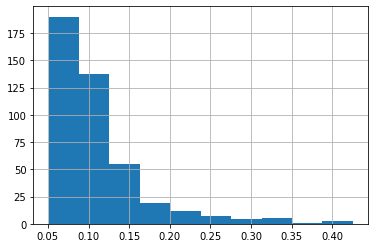

In [4]:
Cluster_data.R200C_DEG.hist()

In [5]:
Cluster_data.GAL_sdss_g_modS_C1_N

0       1.7510
1      19.9998
2       1.5593
3       6.2129
4       7.4678
        ...   
428     5.2535
429     5.6929
430     6.9246
431     4.4470
432     2.2155
Name: GAL_sdss_g_modS_C1_N, Length: 433, dtype: float32

In [6]:
list(Galaxy_data.columns)

['ra',
 'dec',
 'specobjid',
 'CLUS_ID',
 'z',
 'zErr',
 'zWarning',
 'v_los',
 'cModelMag_r',
 'cModelMagErr_r',
 'flags_r',
 'extinction_r',
 'cModelMag_g',
 'cModelMagErr_g',
 'flags_g',
 'extinction_g',
 'cModelMag_i',
 'cModelMagErr_i',
 'flags_i',
 'extinction_i',
 'cModelMag_z',
 'cModelMagErr_z',
 'flags_z',
 'extinction_z']

v_los: 	Line of sight velocity of galaxy (in km/s) with respect to cluster BCG.
 	Computed as v_los = c*(1/1000)*(z_gal - z_BCG])/(1 + z_BCG)

In [7]:
Galaxy_data

,ra,dec,specobjid,CLUS_ID,z,zErr,zWarning,v_los,cModelMag_r,cModelMagErr_r,...,flags_g,extinction_g,cModelMag_i,cModelMagErr_i,flags_i,extinction_i,cModelMag_z,cModelMagErr_z,flags_z,extinction_z
0,119.571870,53.638738,2.105547e+18,1_1172,0.136219,0.000035,0,9112.934223,17.23507,0.005641,...,2252074960060432,0.122412,16.78113,0.005188,2252074960195600,0.062929,16.46983,0.011877,2252074960060432,0.046808
1,119.864610,53.630081,2.105555e+18,1_1172,0.084383,0.000012,0,-4979.975610,16.15208,0.003694,...,2252074960191504,0.125668,15.57720,0.003265,288230651298480144,0.064603,15.61078,0.006936,2252074960195600,0.048053
2,119.796020,53.784186,2.105554e+18,1_1172,-0.000519,0.000009,0,-28062.232989,16.17832,0.004368,...,268468224,0.128670,16.15715,0.004446,285245440,0.066146,16.17055,0.007882,268468224,0.049201
3,119.660040,53.700200,2.105547e+18,1_1172,0.068184,0.000009,0,-9383.849868,16.73223,0.004984,...,2252074960060432,0.130808,16.31826,0.004628,2252074960191504,0.067245,16.03879,0.011602,2252074960060432,0.050018
4,119.649520,53.725027,2.105548e+18,1_1172,1.050130,0.000522,0,257579.003441,18.97087,0.012989,...,268468240,0.130222,19.05038,0.013508,268468240,0.066944,19.04692,0.049372,275146375184,0.049794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62627,7.037279,26.253032,7.071983e+18,2_8798,2.197458,0.000388,0,402407.963764,19.59799,0.022725,...,275146375168,0.140456,19.50224,0.030477,275146375168,0.072205,19.22245,0.123366,275280592896,0.053708
62628,6.929898,26.283447,8.624534e+18,2_8798,0.207917,0.000087,0,-34519.351615,20.19131,0.050896,...,275213484104,0.131673,19.63543,0.044110,275213615176,0.067690,19.09973,0.105809,275347701832,0.050349
62629,7.059230,26.442574,8.624547e+18,2_8798,0.323072,0.000017,0,-9229.855950,21.58912,0.131317,...,275154731264,0.128807,21.88973,0.247275,142737921,0.066217,21.17625,0.595782,18014398643716097,0.049253
62630,7.062792,26.289956,7.070677e+18,2_8798,1.162802,0.000236,4,175185.001154,21.52911,0.130061,...,275154764032,0.140669,21.11993,0.117129,45036271420080128,0.072315,19.88870,0.434835,9007199388991489,0.053789


In [8]:
len(Galaxy_data)/len(Cluster_data)

144.64665127020785

Text(0.5, 0, 'redshift')

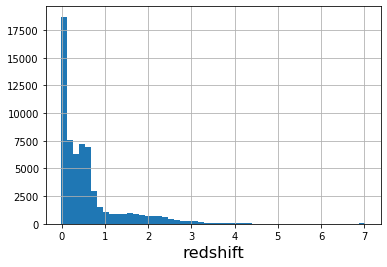

In [9]:
Galaxy_data.z.hist(bins=51)
plt.xlabel('redshift',fontsize=16)

Text(0.5, 0, 'redshift')

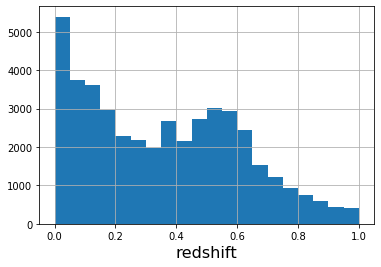

In [10]:
Galaxy_data.z.hist(bins=np.linspace(0.,1.,21))
plt.xlabel('redshift',fontsize=16)

Text(0.5, 0, 'redshift')

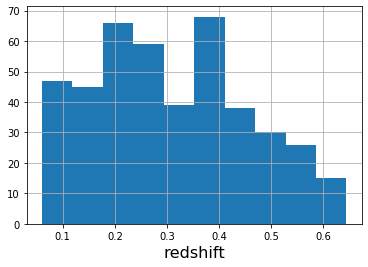

In [11]:
Cluster_data.Z_LAMBDA.hist()
plt.xlabel('redshift',fontsize=16)

Text(0.5, 0, 'v_los')

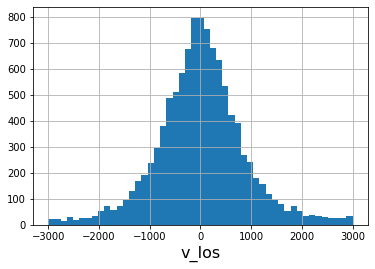

In [12]:
Galaxy_data.v_los.hist(bins=np.linspace(-3000.,3000.))
plt.xlabel('v_los',fontsize=16)


Query: SDSS Dataset
---------------------------------------

Here we want to add information to the galaxy sample. Basically we need the galaxy distance from the cluster center, $R$, and the star formation rate, $SFR$.

Example query:

----------------------------------------------
    -- This query demonstrates the use of a LEFT OUTER JOIN to include rows from the joined table
    -- that do not satisfy the JOIN condition. The OUTER JOIN (LEFT or RIGHT)
    -- is an inclusive JOIN, whereas the INNER (default) JOIN is an exclusive JOIN.
    -- In this case the query returns galaxies with or without spectra that meet the criteria
    -- in the WHERE clause. The ISNULL operator is used to replace null
    -- values with zeros for galaxies without spectra.

----------------------------------------------
    SELECT TOP 10 p.objid, p.ra, p.dec, ISNULL(s.specobjid,0) AS specobjid, ISNULL(s.z, 0) AS z
    FROM Galaxy AS p
    LEFT OUTER JOIN SpecObj s ON s.bestObjID = p.objID
    WHERE
    p.u BETWEEN 0 AND 19.6 AND p.g BETWEEN 0 AND 20


In [13]:
#!conda install -c conda-forge astroquery

In [14]:
from astropy.table import Table,vstack

In [15]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u

## Example
rac,dec= Cluster_data['RA'][0],Cluster_data['DEC'][0]
pos = coords.SkyCoord(rac,dec, frame='icrs', unit='deg')

r   = 2*Cluster_data.R200C_DEG[0]*u.deg
xid = SDSS.query_region(pos, radius=r, spectro=True)

/home/johnny/run/anaconda3/lib/python3.7/site-packages/astroquery/sdss/core.py:865: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  comments='#'))


In [24]:
columns = SDSS.query_region(pos,field_help=True)

In [25]:
columns.keys()

dict_keys(['photoobj_all', 'specobj_all'])

In [29]:
list(columns['photoobj_all'])

['objID',
 'skyVersion',
 'run',
 'rerun',
 'camcol',
 'field',
 'obj',
 'mode',
 'nChild',
 'type',
 'clean',
 'probPSF',
 'insideMask',
 'flags',
 'rowc',
 'rowcErr',
 'colc',
 'colcErr',
 'rowv',
 'rowvErr',
 'colv',
 'colvErr',
 'rowc_u',
 'rowc_g',
 'rowc_r',
 'rowc_i',
 'rowc_z',
 'rowcErr_u',
 'rowcErr_g',
 'rowcErr_r',
 'rowcErr_i',
 'rowcErr_z',
 'colc_u',
 'colc_g',
 'colc_r',
 'colc_i',
 'colc_z',
 'colcErr_u',
 'colcErr_g',
 'colcErr_r',
 'colcErr_i',
 'colcErr_z',
 'sky_u',
 'sky_g',
 'sky_r',
 'sky_i',
 'sky_z',
 'skyIvar_u',
 'skyIvar_g',
 'skyIvar_r',
 'skyIvar_i',
 'skyIvar_z',
 'psfMag_u',
 'psfMag_g',
 'psfMag_r',
 'psfMag_i',
 'psfMag_z',
 'psfMagErr_u',
 'psfMagErr_g',
 'psfMagErr_r',
 'psfMagErr_i',
 'psfMagErr_z',
 'fiberMag_u',
 'fiberMag_g',
 'fiberMag_r',
 'fiberMag_i',
 'fiberMag_z',
 'fiberMagErr_u',
 'fiberMagErr_g',
 'fiberMagErr_r',
 'fiberMagErr_i',
 'fiberMagErr_z',
 'fiber2Mag_u',
 'fiber2Mag_g',
 'fiber2Mag_r',
 'fiber2Mag_i',
 'fiber2Mag_z',
 'fiber2

In [28]:
list(columns['specobj_all'])

['specObjID',
 'bestObjID',
 'fluxObjID',
 'targetObjID',
 'plateID',
 'sciencePrimary',
 'sdssPrimary',
 'legacyPrimary',
 'seguePrimary',
 'segue1Primary',
 'segue2Primary',
 'bossPrimary',
 'bossSpecObjID',
 'firstRelease',
 'survey',
 'instrument',
 'programname',
 'chunk',
 'platerun',
 'mjd',
 'plate',
 'fiberID',
 'run1d',
 'run2d',
 'tile',
 'designID',
 'legacy_target1',
 'legacy_target2',
 'special_target1',
 'special_target2',
 'segue1_target1',
 'segue1_target2',
 'segue2_target1',
 'segue2_target2',
 'boss_target1',
 'eboss_target0',
 'eboss_target1',
 'eboss_target2',
 'eboss_target_id',
 'ancillary_target1',
 'ancillary_target2',
 'thing_id_targeting',
 'thing_id',
 'primTarget',
 'secTarget',
 'spectrographID',
 'sourceType',
 'targetType',
 'ra',
 'dec',
 'cx',
 'cy',
 'cz',
 'xFocal',
 'yFocal',
 'lambdaEff',
 'blueFiber',
 'zOffset',
 'z',
 'zErr',
 'zWarning',
 'class',
 'subClass',
 'rChi2',
 'DOF',
 'rChi2Diff',
 'z_noqso',
 'zErr_noqso',
 'zWarning_noqso',
 'clas

In [16]:
Galaxy_data[np.in1d(Galaxy_data['specobjid'],xid['specobjid'])]

,ra,dec,specobjid,CLUS_ID,z,zErr,zWarning,v_los,cModelMag_r,cModelMagErr_r,...,flags_g,extinction_g,cModelMag_i,cModelMagErr_i,flags_i,extinction_i,cModelMag_z,cModelMagErr_z,flags_z,extinction_z
0,119.57187,53.638738,2.105547e+18,1_1172,0.136219,0.000035,0,9112.934223,17.23507,0.005641,...,2252074960060432,0.122412,16.78113,0.005188,2252074960195600,0.062929,16.46983,0.011877,2252074960060432,0.046808
1,119.86461,53.630081,2.105555e+18,1_1172,0.084383,0.000012,0,-4979.975610,16.15208,0.003694,...,2252074960191504,0.125668,15.57720,0.003265,288230651298480144,0.064603,15.61078,0.006936,2252074960195600,0.048053
2,119.79602,53.784186,2.105554e+18,1_1172,-0.000519,0.000009,0,-28062.232989,16.17832,0.004368,...,268468224,0.128670,16.15715,0.004446,285245440,0.066146,16.17055,0.007882,268468224,0.049201
3,119.66004,53.700200,2.105547e+18,1_1172,0.068184,0.000009,0,-9383.849868,16.73223,0.004984,...,2252074960060432,0.130808,16.31826,0.004628,2252074960191504,0.067245,16.03879,0.011602,2252074960060432,0.050018
4,119.64952,53.725027,2.105548e+18,1_1172,1.050130,0.000522,0,257579.003441,18.97087,0.012989,...,268468240,0.130222,19.05038,0.013508,268468240,0.066944,19.04692,0.049372,275146375184,0.049794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,119.68401,54.012931,2.105543e+18,1_1172,0.104336,0.000022,0,444.889481,17.17121,0.005671,...,2252074960060432,0.129801,16.82756,0.006108,2252074960060432,0.066728,16.49989,0.013060,2252074960060432,0.049633
270,119.71908,54.019926,2.105544e+18,1_1172,0.101207,0.000020,0,-405.850120,17.56311,0.007197,...,275163152896,0.129726,16.91958,0.007223,275163152896,0.066690,16.62916,0.016645,275297370624,0.049605
271,119.90482,54.172851,2.105558e+18,1_1172,-0.000458,0.000028,0,-28045.690818,17.98277,0.006932,...,276856832,0.114275,18.28871,0.010409,268468224,0.058746,18.62080,0.044731,275146506240,0.043696
272,119.91278,54.340320,2.106645e+18,1_1172,-0.000026,0.000008,0,-27928.228623,16.87777,0.020537,...,18085042401482009,0.119677,14.16375,0.005414,288441757264154649,0.061523,14.67629,0.019938,9218580635090969,0.045762


In [17]:
xid['ra','dec','objid']

ra,dec,objid
float64,float64,int64
119.731850983542,53.808629370114,1237663788492849298
120.007653253515,53.8058947518575,1237663788492915062
119.916592586859,53.8788300095475,1237663788492915078
119.914370418357,53.7822838788238,1237663788492915117
119.88411544398,53.8070487731102,1237663788492915152
120.078739989428,53.9013634113666,1237663788492980232
119.97248910819,54.0027819810542,1237663788492980322
119.989892368375,53.9843367947206,1237663788492980798
119.999198560355,53.9606782064299,1237663788492980923


In [18]:
def query_galaxy_sample(cluster):
    rac,dec= cluster['RA'],cluster['DEC']
    radii  = 2*cluster.R200C_DEG
    cid    = cluster.CLUS_ID
    
    data    = []
    for i in range(len(cluster)):
        print('Cluster ID: %s'%(cid[i]))
        
        pos = coords.SkyCoord(rac[i],dec[i], frame='icrs', unit='deg')
        r   = 2*radii[i]*u.deg
        xid = SDSS.query_region(pos, radius=r, spectro=True)
        data.append(xid)
        print('nobj : %i'%(len(xid)))
        print('\n')
        
    return vstack(data)

In [19]:
new_galaxy = query_galaxy_sample(Cluster_data[:5])

Cluster ID: 1_1172 
nobj : 926


Cluster ID: 1_11970
nobj : 188


Cluster ID: 1_1198 
nobj : 298


Cluster ID: 1_11985
nobj : 593


Cluster ID: 1_12054
nobj : 188




In [20]:
new_galaxy

ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d,instrument
float64,float64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,bytes7,bytes4
120.270884634309,53.216884656394,1237663787955847262,4264,301,3,121,0.6783051,3682,55244,775,4145776575353167872,v5_10_0,BOSS
120.060987803716,53.2212645821863,1237663787955847715,4264,301,3,121,-0.0008408227,3682,55244,762,4145773001940377600,v5_10_0,BOSS
120.207220245159,53.192190070101,1237663787955847755,4264,301,3,121,0.5729772,3682,55244,777,4145777125108981760,v5_10_0,BOSS
120.179743210887,53.2046699076062,1237663787955847763,4264,301,3,121,0.5735269,3682,55244,771,4145775475841540096,v5_10_0,BOSS
120.135842036254,53.3221498095868,1237663787955847926,4264,301,3,121,0.5267463,3682,55244,769,4145774926085726208,v5_10_0,BOSS
120.115440583169,53.341048409345,1237663787955847951,4264,301,3,121,-0.0001273017,3682,55244,772,4145775750719447040,v5_10_0,BOSS
120.365166505558,53.2647766051244,1237663787955848261,4264,301,3,121,0.5761835,3682,55244,776,4145776850231074816,v5_10_0,BOSS
120.416660510754,53.3457957609304,1237663787955912972,4264,301,3,122,2.360088,3682,55244,774,4145776300475260928,v5_10_0,BOSS
120.258921328074,53.421843545358,1237663787955913717,4264,301,3,122,0.588232,3682,55244,765,4145773826574098432,v5_10_0,BOSS


In [151]:
Galaxy_data[np.in1d(Galaxy_data['specobjid'],new_galaxy['specobjid'])]

,specobjid,CLUS_ID,z,zErr,v_los,cModelMag_r,cModelMagErr_r,flags_r,extinction_r,cModelMag_g,cModelMagErr_g,flags_g,extinction_g
0,4.163690e+18,1_1172,0.521020,0.000072,113729.327919,21.23721,0.107189,2312669052545302545,0.086831,21.21924,0.164698,2308165452926320913,0.125516
1,4.163690e+18,1_1172,0.593601,0.000136,133461.908338,19.90780,0.041608,4503874773746976,0.088387,20.70138,0.104693,275154764032,0.127765
2,4.163692e+18,1_1172,-0.000089,0.000028,-27945.246770,19.87510,0.018645,4503874807300112,0.088158,20.09538,0.017178,302022672,0.127434
3,4.163691e+18,1_1172,0.064723,0.000011,-10324.856170,21.13658,0.220534,4574243551477777,0.087460,21.02419,0.101374,302022672,0.126425
4,4.163692e+18,1_1172,0.000157,0.000022,-27878.630948,18.07116,0.007055,4503599895838720,0.088666,18.96835,0.009199,268468224,0.128168
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,5.099342e+18,1_1227,0.608180,0.000302,81782.716670,21.00318,0.072581,2312598683801092112,0.099431,22.41048,0.231217,2308165452917900561,0.143729
1036,8.219233e+18,1_1227,2.909849,0.000803,627903.020808,21.09571,0.062863,4503874773712912,0.100446,21.41755,0.072631,275146375184,0.145196
1037,8.197781e+18,1_1227,1.405226,0.000235,270898.964025,22.07284,0.125239,4503874773712896,0.100170,22.39889,0.112393,275146342400,0.144797
1062,8.219232e+18,1_1227,-0.000007,0.000024,-62522.566499,20.80857,0.038388,4503599895969792,0.094207,23.01912,0.287093,1099520180481,0.136178


In [35]:
def aperture_match(ra_cluster,dec_cluster,ra_galaxy,dec_galaxy,r_aper=1/60):
    '''
    Get circles with rmax (Mpc) around each cluster position

    Parameters
    ----------
    ra : float, array
    cluster and galaxy, right ascension of the object in degrees.
    dec : float, array
    cluster and galaxy, declination of the object in degrees.
    ang_diam_dist: array
    angular distance in Mpc
    rmax : float
    aperture radius in Mpc

    Returns
    -------
    indicies_into_galaxies_in_aperture : array
    indices for the galaxies in the circles
    indicies_into_clusters : array
    indices for the cluster table
    radii: array
    relative distance from the center in Mpc
    '''
    import esutil 
    depth=10
    h=esutil.htm.HTM(depth)
    #Inner match
    m1i,m2i,disti=h.match(ra_cluster,dec_cluster,ra_galaxy,dec_galaxy,radius=r_aper,maxmatch=0)

    indicies_into_galaxies_in_aperture=[]
    indicies_into_clusters=[]
    for i in range(len(ra_cluster)):
        w_i=np.where(m1i==i)
        indicies_into_galaxies_in_aperture_i=m2i[w_i]
        indicies_into_galaxies_in_aperture.append(indicies_into_galaxies_in_aperture_i)
        indicies_into_clusters_i = m1i[w_i]
        indicies_into_clusters.append(indicies_into_clusters_i)

    indicies_into_galaxies_in_aperture=np.concatenate(indicies_into_galaxies_in_aperture)
    indicies_into_clusters=np.concatenate(indicies_into_clusters)

    #radii = np.array( disti*(np.pi/180)*ang_diam_dist[indicies_into_clusters] )

    return indicies_into_galaxies_in_aperture, indicies_into_clusters, disti


In [127]:
ra_cluster    = Cluster_data.RA.to_numpy()
dec_cluster   = Cluster_data.DEC.to_numpy()

ra_galaxy     = Galaxy_data.ra.to_numpy()
dec_galaxy    = Galaxy_data.dec.to_numpy()

rmax          = 2.*Cluster_data.R200C_DEG.to_numpy()
id0,id1,radii = aperture_match(ra_cluster,dec_cluster,ra_galaxy,dec_galaxy,r_aper=rmax)

In [145]:
rnorm = 2*radii/rmax[id1]

Text(0, 0.5, 'galaxy density [deg$^{-2}$]')

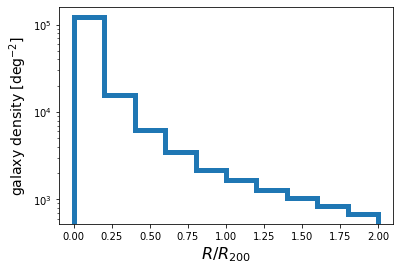

In [146]:
rbins = np.linspace(0.,2.,11)
area  = np.pi*(rbins[1:]**2-rbins[:-1]**2)

_  = plt.hist(rnorm,bins=rbins[:],weights=1/(np.pi*rnorm**2+1e-3),histtype='step',lw=5)
plt.yscale('log')
# plt.ylim(1e3,2e6)
plt.xlabel(r'$R/R_{200}$',fontsize=16)
plt.ylabel(r'galaxy density [deg$^{-2}$]',fontsize=14)


Statstistics 
---------------------------------------

Let's compute the number of galaxies per cluster and check the magnitude completeness of the sample.

In [147]:
mag = Galaxy_data.cModelMag_r[id0]

In [144]:
ddec= 2*(dec_galaxy[id0]-dec_cluster[id1])/rmax[id1]
dra = 2*(ra_galaxy[id0]-ra_cluster[id1])*np.cos(dec_cluster[id1]* np.pi / 180. )/rmax[id1]

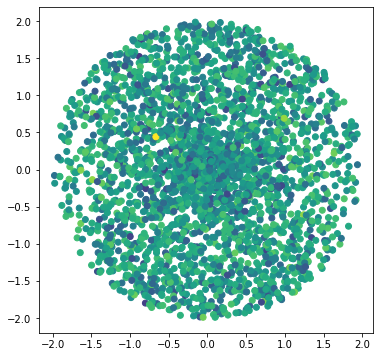

In [151]:
plt.figure(figsize=(6,6))
plt.scatter(dra[::20],ddec[::20],c=mag[::20])